In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

# 1. 데이터 생성
- 남,여 키와 몸무게 데이터를 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [16]:
random.randint(140, 195)

162

In [103]:
data = []
for i in range(50):
    # 여자 데이터 data추가
    data.append([random.randint(40, 70), random.randint(140, 170)])
    # 남자 데이터 data추가
    data.append([random.randint(60, 95), random.randint(160, 195)])
#data

In [36]:
# 여자
# for female in data[::2]:
#     print(female, end=' ')
# print('여자 : ', [female for female in data[::2]])
# print('남자 : ', [male for male in data[1::2]])
print('====================================================')
print('여자 몸무게(x축) :',  [female[0] for female in data[::2]] )
print('여자 키(y축) :',  [female[1] for female in data[::2]] )

print('남자 몸무게(x축) : ', [male[0] for male in data[1::2]])
print('남자 키(y축) : ', [male[1] for male in data[1::2]])

여자 몸무게(x축) : [64, 50, 44, 44, 44, 57, 45, 42, 52, 65, 61, 44, 40, 64, 59, 57, 40, 69, 69, 47, 60, 65, 70, 46, 41, 70, 59, 45, 56, 55, 68, 42, 65, 52, 44, 44, 50, 47, 63, 54, 56, 47, 53, 59, 70, 55, 53, 52, 48, 53]
여자 키(y축) : [169, 169, 147, 168, 161, 166, 152, 170, 146, 160, 143, 164, 154, 163, 146, 163, 154, 165, 163, 170, 149, 149, 161, 151, 154, 141, 145, 141, 155, 152, 161, 166, 165, 155, 147, 153, 163, 154, 168, 162, 163, 152, 160, 152, 164, 159, 155, 146, 160, 150]
남자 몸무게(x축) :  [86, 88, 76, 65, 91, 94, 61, 84, 92, 80, 60, 72, 69, 85, 75, 95, 70, 60, 67, 72, 76, 92, 80, 81, 67, 93, 64, 86, 73, 60, 62, 85, 63, 79, 75, 95, 76, 93, 61, 80, 70, 65, 70, 64, 80, 95, 64, 84, 85, 90]
남자 키(y축) :  [184, 169, 194, 186, 172, 160, 169, 195, 160, 184, 182, 168, 169, 177, 181, 176, 169, 165, 178, 180, 164, 195, 166, 182, 171, 180, 185, 164, 170, 194, 177, 166, 189, 194, 162, 162, 177, 182, 178, 166, 180, 177, 187, 195, 187, 190, 191, 194, 184, 193]


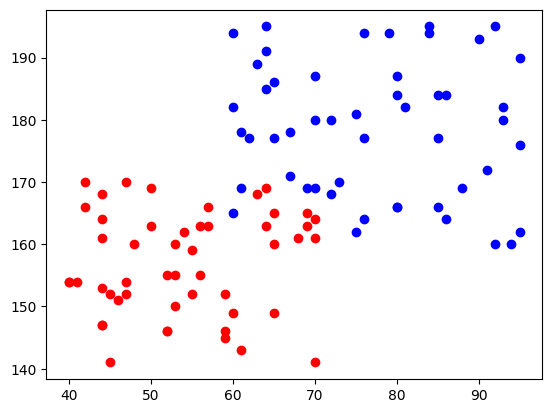

In [45]:
plt.plot([female[0] for female in data[::2]], 
        [female[1] for female in data[::2]], 'o', color='r')
plt.plot([male[0] for male in data[1::2]],
        [male[1] for male in data[1::2]], 'o', color='b')
plt.show()

# 2. 군집화 로직

In [46]:
# 초기 랜덤 지점 2개
random_points = [
    [random.randint(40,95), random.randint(140,195)],
    [random.randint(40,95), random.randint(140,195)]
]
random_points

[[94, 174], [59, 191]]

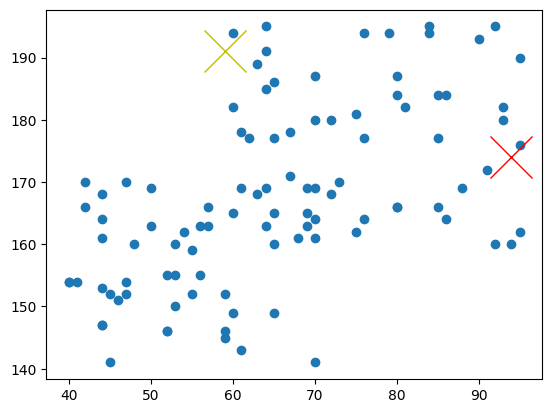

In [58]:
plt.plot( [d[0] for d in data] ,
         [d[1] for d in data], 'o')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=30) # 기준점0(random_points[0])
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='y', markersize=30) # 기준점1(random_points[1])

In [61]:
# 두 점 거리를 return / a : [0,0]
def dist(a, b):
    return np.sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2 )
print(dist([3,4], [0,0]))
print(dist(random_points[0], data[0]))
print(dist(random_points[1], data[0]))

5.0
30.4138126514911
22.561028345356956


In [62]:
# random_points[0]에 가까운 그룹과 random_points[1]에 가까운 그룹을 분류
group0 = []
group1 = []
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(39, 61)

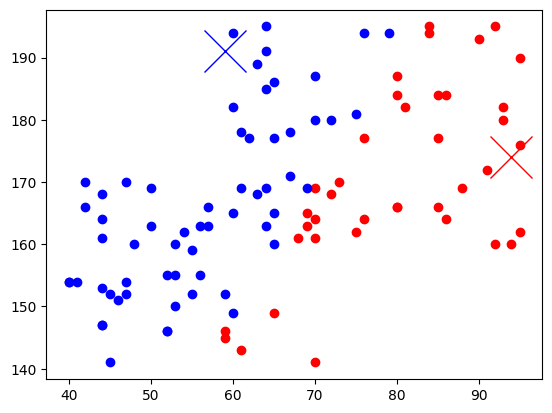

In [65]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=30)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b')
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=30)

In [76]:
# 기준점 이동 : group0의 중심점(기준점0), group1의 중심점(기준점1)
group0_meanX = np.mean([d[0] for d in group0])
group0_meanY = np.mean([d[1] for d in group0])
random_points[0] = [group0_meanX, group0_meanY]

group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[1] = [group1_meanX, group1_meanY]
random_points

[[79.8974358974359, 170.15384615384616],
 [56.278688524590166, 166.0655737704918]]

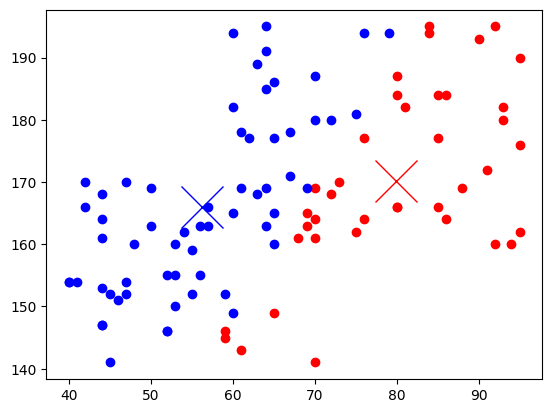

In [77]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=30)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b')
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=30)

# 3. 군집화 전체 코드(for문 이용)
- 랜덤포인트 2개 지정
- 랜덤포인트 2개 출력과 시각화(x)
- for문
    * 랜덤포인트 2지점 기준으로 group0과 group1나눔
    * group0의 중간점과 group1의 중간점을 랜덤포인트로 업데이트
    * 랜덤 포인트 출력과 시각화

초기 기준점 : [[89, 150], [67, 184]]
1 번째 points : [[71.88, 156.32], [63.36, 171.44]]
2 번째 points : [[66.97222222222223, 156.05555555555554], [64.65625, 174.1875]]
3 번째 points : [[60.18, 156.12], [70.8, 179.2]]
4 번째 points : [[54.44230769230769, 157.17307692307693], [77.45833333333333, 179.02083333333334]]
5 번째 points : [[53.62, 157.02], [77.36, 178.3]]
6 번째 points : [[53.62, 157.02], [77.36, 178.3]]
7 번째 points : [[53.62, 157.02], [77.36, 178.3]]
8 번째 points : [[53.62, 157.02], [77.36, 178.3]]
9 번째 points : [[53.62, 157.02], [77.36, 178.3]]


(140.0, 195.0)

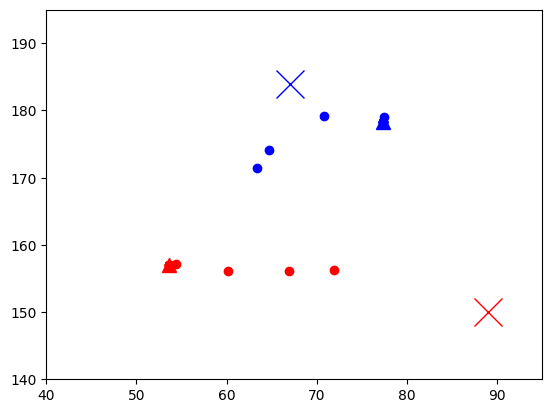

In [86]:
points = [
    [random.randint(40, 95), random.randint(140,195)],
    [random.randint(40, 95), random.randint(140,195)],
]
print('초기 기준점 :', points)
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)
for i in range(1, 10):
    # 포인트 2지점 기준으로 group0과 group1나눔
    group0 = []
    group1 = []
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
        
    # group0의 중간점, group1의 중간점으로 points 업데이트
    group0_mean_X = np.mean([d[0] for d in group0])
    group0_mean_Y = np.mean([d[1] for d in group0])
    points[0] = [group0_mean_X, group0_mean_Y]
    group1_mean_X = np.mean([d[0] for d in group1])
    group1_mean_Y = np.mean([d[1] for d in group1])
    points[1] = [group1_mean_X, group1_mean_Y]
    
    # 포인트 출력
    print(i, '번째 points :', points)
    plt.plot(points[0][0], points[0][1], 'o', color='r')
    plt.plot(points[1][0], points[1][1], 'o', color='b')

plt.plot(points[0][0], points[0][1], '^', color='r', markersize=10)
plt.plot(points[1][0], points[1][1], '^', color='b', markersize=10)
plt.xlim([40,95])
plt.ylim([140,195])

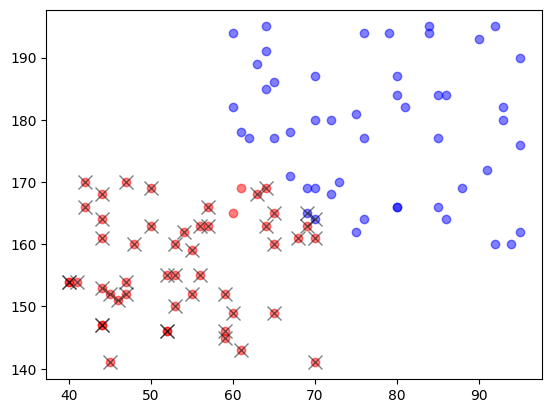

In [95]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', color='k', alpha=0.5, markersize=10)

# 4. api(sklearn)를 이용한 군집화
- sklearn : 머신러닝 패키지
    * 예측모델 : 분류, 회귀, 군집분석 - fit(학습), predict(예측-분류/회귀)
    * 변환모델 : 전처리시 사용 ex. 인코딩, 스케일조정 - fit(학습), transform(변환함수), fit_transform(학->변)

In [ ]:
# 군집분석 라이브러리가 경고 메세지(joblib 충돌) 출력할 경우
# import os
# os.environ['OMP_NUM_THREADS'] = '1'

In [104]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2, # 2개 그룹으로 군집
              init='random', # 초기 기준점을 random하게
              n_init=10,     # 10번 실행
              random_state=7) # random 결과를 일관적으로 맞추기 위한 seed
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [105]:
# 기준점(중심점)
model.cluster_centers_

array([[ 78.50980392, 173.43137255],
       [ 55.48979592, 152.97959184]])

In [106]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [108]:
group0 = data[model.labels_==0]
group1 = data[model.labels_==1]

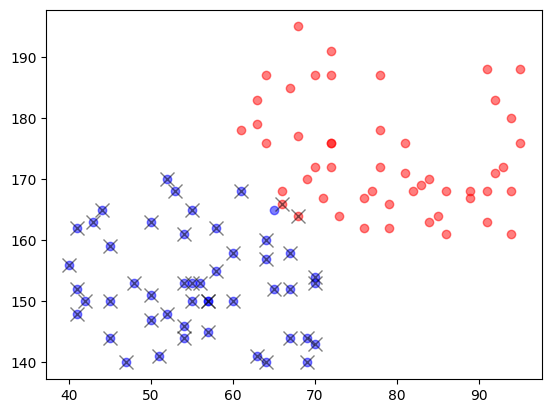

In [109]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', color='k', alpha=0.5, markersize=10)